In [197]:
# importing some useful libraries for the first part of project
import numpy as np
import scipy
import pandas as pd
import math
import random
import pickle
import seaborn as sns

from sklearn.multioutput import RegressorChain
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

In [198]:
# Load the data from local computer, and drop redundant features.
df = pd.read_csv('Paper3_WebData_Final.csv')
df = df.drop(['test_date','nid','gender','naics', 'age_group','region','NAICS_descr'], axis=1)
df_L = df.drop(['R500k','R1k','R2k','R3k', 'R4k', 'R6k', 'R8k'], axis=1)
df_R = df.drop(['L500k','L1k','L2k','L3k', 'L4k', 'L6k', 'L8k'], axis=1)

# Seperating left and right ears data so that we could use them for creating model.
df_L.columns = ['500k','1k','2k','3k', '4k', '6k', '8k']
df_R.columns = ['500k','1k','2k','3k', '4k', '6k', '8k']
data = pd.concat([df_L, df_R], axis=0)
data =data.reset_index(drop=True)
# showing data
print(data.shape)
data.head(10)

C:\Users\gjaha\anaconda3\envs\cv\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5889340, 7)


,500k,1k,2k,3k,4k,6k,8k
0,10,5,5,15,10,5,25
1,15,10,5,15,5,10,25
2,5,10,20,20,15,20,0
3,15,5,15,20,20,15,15
4,25,20,15,20,35,25,15
5,15,20,30,30,40,60,45
6,10,15,35,25,25,70,50
7,25,25,35,60,80,90,85
8,10,10,10,40,45,35,0
9,10,5,10,45,45,35,20


In [199]:
# cleaning data, removing nan values, and '**', and converting object type to int.
data.isnull().sum()/data.shape[0]
data = data.replace('**',np.nan)
data = data.dropna()
data.isnull().sum()
data=data.astype(float)

# showing data
print(data.shape)
data.head()

(4313298, 7)


,500k,1k,2k,3k,4k,6k,8k
0,10.0,5.0,5.0,15.0,10.0,5.0,25.0
1,15.0,10.0,5.0,15.0,5.0,10.0,25.0
2,5.0,10.0,20.0,20.0,15.0,20.0,0.0
3,15.0,5.0,15.0,20.0,20.0,15.0,15.0
4,25.0,20.0,15.0,20.0,35.0,25.0,15.0


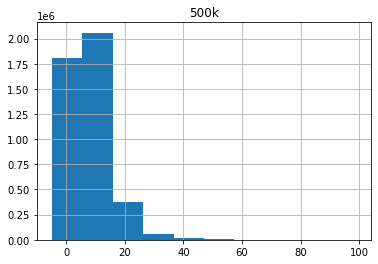

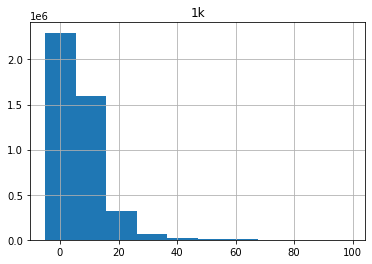

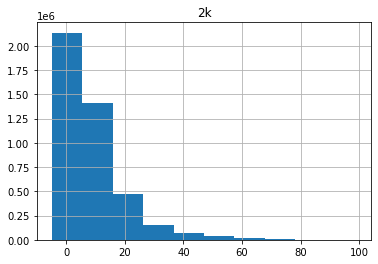

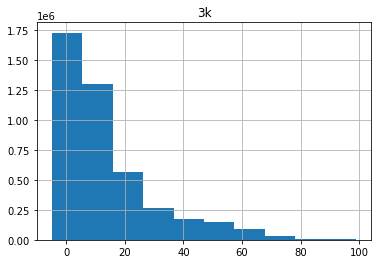

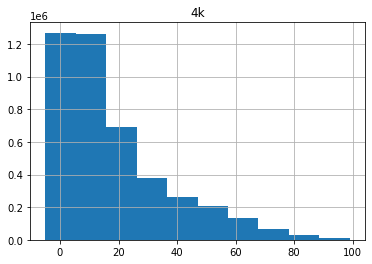

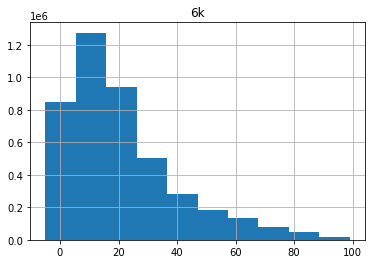

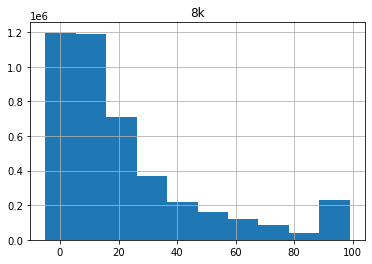

In [200]:
# Distribuation of samples for each column before removing duplicates
for col in data:
    data.hist(column=col)

(1029866, 7)


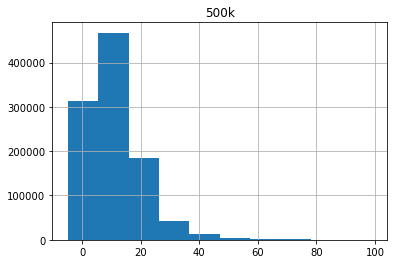

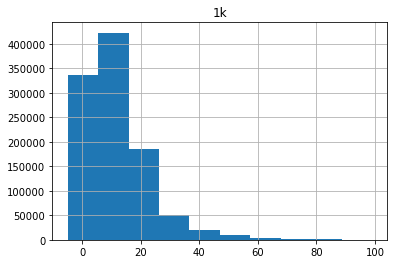

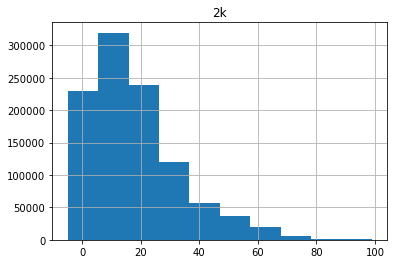

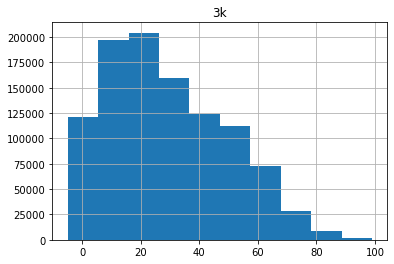

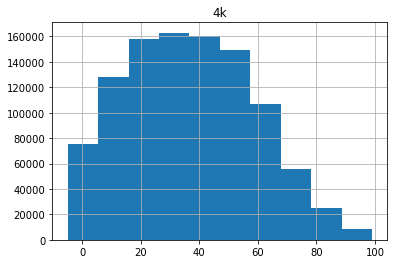

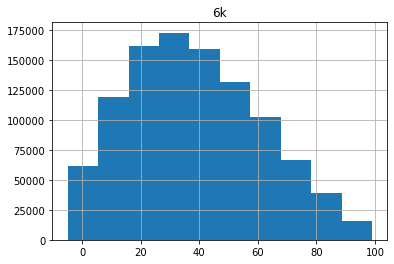

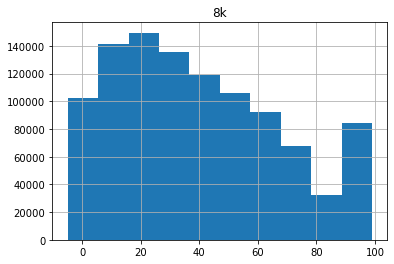

In [201]:
# Distribuation of samples for each column before removing duplicates
# drop the duplicate data
df = data.copy()
df =df.drop_duplicates()
print(df.shape)
for col in df:
    df.hist(column=col)

### Since there is a difference between distribution of these two datasets, we would consider dataset without duplicates.

### Here I want to remove duplicates,first by considering all columns, and  removing backward, which means removing duplicates based on 7 features, and removing based on 6 features, and so on.

In [202]:
print(df.shape)

(1029866, 7)


In [203]:
#Generate train and test datasets
df_train, df_test= train_test_split(df, test_size=0.20, random_state=42)

df_train.shape, df_test.shape, df.shape

((823892, 7), (205974, 7), (1029866, 7))

### These are steps to create datset for each of four models I want to use and build.

In [205]:
df_train_8k = df_train.drop('8k',axis=1)
df_train_8k =df_train_8k.drop_duplicates()
df_train_8k.shape
val_index_8k = list(df_train_8k.index.values.tolist())
pd.Series(val_index_8k).value_counts()
print(len(val_index_8k))

328717


In [207]:
df_8k = df_train.loc[val_index_8k]

In [208]:
df_train_3k = df_train_8k.drop('3k',axis=1)
df_train_3k =df_train_3k.drop_duplicates()
print(df_train_3k.shape)
val_index_3k = list(df_train_3k.index.values.tolist())
print(len(val_index_3k))

(99453, 5)
99453


In [209]:
df_3k = df_train.loc[val_index_3k]

In [210]:
df_train_1k = df_train_3k.drop('1k',axis=1)
df_train_1k =df_train_1k.drop_duplicates()
print(df_train_1k.shape)
val_index_1k = list(df_train_1k.index.values.tolist())
print(len(val_index_1k))

(32319, 4)
32319


In [212]:
df_1k = df_train.loc[val_index_1k]

In [211]:
df_train_500k = df_train_1k.drop('500k',axis=1)
df_train_500k =df_train_500k.drop_duplicates()
print(df_train_500k.shape)
val_index_500k = list(df_train_500k.index.values.tolist())
print(len(val_index_500k))

(5632, 3)
5632


In [214]:
df_500k = df_train.loc[val_index_500k]
df_500k

,500k,1k,2k,3k,4k,6k,8k
176241,45.0,55.0,60.0,55.0,55.0,70.0,70.0
3537855,5.0,5.0,15.0,60.0,65.0,65.0,30.0
661980,5.0,15.0,15.0,25.0,30.0,45.0,30.0
613934,15.0,10.0,5.0,15.0,20.0,5.0,10.0
707220,0.0,0.0,0.0,30.0,25.0,10.0,25.0
...,...,...,...,...,...,...,...
5505542,65.0,70.0,80.0,45.0,55.0,50.0,65.0
965514,25.0,25.0,40.0,96.0,60.0,96.0,96.0
5408412,10.0,5.0,20.0,15.0,5.0,-5.0,-5.0
4956019,0.0,15.0,10.0,15.0,30.0,98.0,35.0


In [215]:
df_m = df_500k
print(df_m.shape)
df_m.head(10)

(5632, 7)


,500k,1k,2k,3k,4k,6k,8k
176241,45.0,55.0,60.0,55.0,55.0,70.0,70.0
3537855,5.0,5.0,15.0,60.0,65.0,65.0,30.0
661980,5.0,15.0,15.0,25.0,30.0,45.0,30.0
613934,15.0,10.0,5.0,15.0,20.0,5.0,10.0
707220,0.0,0.0,0.0,30.0,25.0,10.0,25.0
594998,15.0,20.0,20.0,45.0,40.0,35.0,35.0
5716875,10.0,10.0,0.0,35.0,60.0,65.0,30.0
2064719,5.0,10.0,0.0,0.0,35.0,5.0,0.0
870459,20.0,15.0,20.0,55.0,65.0,75.0,75.0
1536507,5.0,10.0,15.0,55.0,55.0,50.0,70.0


,500k,1k,2k,3k,4k,6k,8k
500k,1.000000,0.881773,0.627287,0.410369,0.257450,0.267484,0.266966
1k,0.881773,1.000000,0.736224,0.474444,0.285216,0.268273,0.287207
2k,0.627287,0.736224,1.000000,0.673939,0.380010,0.247400,0.300210
3k,0.410369,0.474444,0.673939,1.000000,0.781495,0.425898,0.449145
4k,0.257450,0.285216,0.380010,0.781495,1.000000,0.492941,0.486598
6k,0.267484,0.268273,0.247400,0.425898,0.492941,1.000000,0.778395
8k,0.266966,0.287207,0.300210,0.449145,0.486598,0.778395,1.000000


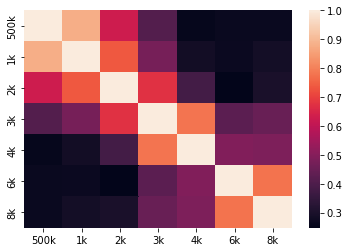

In [216]:
# looking at correlation between variables
sns.heatmap(df_m.corr())
df_m.corr()

### Based on this heatmap, I would predict 3k, and 8k, and 1k ,a nd 500k in sequence.

In [218]:
# seperating data for train, and test, based on three inputs, and 1 output
inputs = df_m.loc[:,["2k", "4k", "6k"]]
outputs = df_m.loc[:,["3k"]]
inputs.shape, outputs.shape

((5632, 3), (5632, 1))

In [240]:
#Generate train and validation datasets
X_train_L1, X_test_L1, y_train_L1, y_test_L1,= train_test_split(inputs,outputs ,test_size=0.20, random_state=42)

X_train_L1.shape, X_test_L1.shape, y_train_L1.shape, y_test_L1.shape

((4505, 3), (1127, 3), (4505, 1), (1127, 1))

In [241]:
# converting pandas dataframe to numpy array
X_train_L1 = X_train_L1.to_numpy()
X_test_L1 = X_test_L1.to_numpy()

y_train_L1 = y_train_L1.to_numpy()
y_test_L1 = y_test_L1.to_numpy()
y_train_L1 = y_train_L1.flatten()
y_test_L1 = y_test_L1.flatten()
X_train_L1.shape, X_test_L1.shape, y_train_L1.shape, y_test_L1.shape

((4505, 3), (1127, 3), (4505,), (1127,))

(4505, 3)

### Now that we have done all preprocessing, we create a model to predict '3k' column, and tune the model

In [242]:
#List Hyperparameters that we want to tune for the first model.

para_grids = {
            'max_depth': [1,5,10, 20, 50, 70, 80, 100, None],
            "n_estimators" : [10,50,100, 300, 500],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

regr_rf = RandomForestRegressor(random_state=0)
clf = GridSearchCV(regr_rf, para_grids, cv=3, n_jobs = 1,return_train_score=True)
model = clf.fit(X_train_L1, y_train_L1)
print(model.best_params_)
print(model.score(X_train_L1, y_train_L1))

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.7929575314176105


In [243]:
# Implement the hyperparamters
regr_rf = RandomForestRegressor(n_estimators=500, max_depth=5, max_features="auto", bootstrap=True)
regr_rf.fit(X_train_L1, y_train_L1)
y_rf = regr_rf.predict(X_test_L1)


In [244]:
# Evaluate the regressor for three models
mse_one = mean_squared_error(y_test_L1, y_rf)
print(f'MSE for first regressor: {mse_one}')
mae_one = mean_absolute_error(y_test_L1, y_rf)
print(f'MAE for first regressor: {mae_one}')

MSE for first regressor: 151.39367094488338
MAE for first regressor: 9.220128791691828


### Now it is time to create the second model to predict '8k'

In [245]:
df_m_2 = df_1k
print(df_m_2.shape)
df_m_2.head(10)

(32319, 7)


,500k,1k,2k,3k,4k,6k,8k
176241,45.0,55.0,60.0,55.0,55.0,70.0,70.0
3537855,5.0,5.0,15.0,60.0,65.0,65.0,30.0
661980,5.0,15.0,15.0,25.0,30.0,45.0,30.0
613934,15.0,10.0,5.0,15.0,20.0,5.0,10.0
707220,0.0,0.0,0.0,30.0,25.0,10.0,25.0
594998,15.0,20.0,20.0,45.0,40.0,35.0,35.0
5716875,10.0,10.0,0.0,35.0,60.0,65.0,30.0
2064719,5.0,10.0,0.0,0.0,35.0,5.0,0.0
870459,20.0,15.0,20.0,55.0,65.0,75.0,75.0
1536507,5.0,10.0,15.0,55.0,55.0,50.0,70.0


In [248]:
# seperating data for train, and test, based on four inputs, and 1 outputs
inputs_2 = df_m_2.loc[:,["2k", "4k", "6k","3k"]]
outputs_2 = df_m_2.loc[:,["8k"]]
inputs_2.shape, outputs_2.shape

((32319, 4), (32319, 1))

In [249]:
#Generate train and validation datasets
X_train_L2, X_test_L2, y_train_L2, y_test_L2,= train_test_split(inputs_2, outputs_2 ,test_size=0.20, random_state=42)

X_train_L2.shape, X_test_L2.shape, y_train_L2.shape, y_test_L2.shape

((25855, 4), (6464, 4), (25855, 1), (6464, 1))

In [250]:
# converting pandas dataframe to numpy array
X_train_L2 = X_train_L2.to_numpy()
X_test_L2 = X_test_L2.to_numpy()

y_train_L2 = y_train_L2.to_numpy()
y_test_L2 = y_test_L2.to_numpy()
y_train_L2 = y_train_L2.flatten()
y_test_L2 = y_test_L2.flatten()
X_train_L2.shape, X_test_L2.shape, y_train_L2.shape, y_test_L2.shape

((25855, 4), (6464, 4), (25855,), (6464,))

In [252]:
#List Hyperparameters that we want to tune for the second model.

para_grids = {
            'max_depth': [1,5,10, 20, 50, 70, 80, 100, None],
            "n_estimators" : [10,50,100, 300, 500],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

regr_rf2 = RandomForestRegressor(random_state=0)
clf2 = GridSearchCV(regr_rf2, para_grids, cv=3, n_jobs = 1,return_train_score=True)
model2 = clf2.fit(X_train_L2, y_train_L2)
print(model2.best_params_)
print(model2.score(X_train_L2, y_train_L2))

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}
0.6570661968353547


In [253]:
# Implement the hyperparamters
regr_rf2 = RandomForestRegressor(n_estimators=300, max_depth=10, max_features="log2", bootstrap=True)
regr_rf2.fit(X_train_L2, y_train_L2)
y_rf2 = regr_rf2.predict(X_test_L2)

In [254]:
# Evaluate the regressor for three models
mse_one2 = mean_squared_error(y_test_L2, y_rf2)
print(f'MSE for first regressor: {mse_one2}')
mae_one2 = mean_absolute_error(y_test_L2, y_rf2)
print(f'MAE for first regressor: {mae_one2}')

MSE for first regressor: 343.4183600398706
MAE for first regressor: 13.03062227470727


### Now it is time to create the second model to predict '1k'

In [255]:
df_m_3 = df_3k
print(df_m_3.shape)
df_m_3.head(10)

(99453, 7)


,500k,1k,2k,3k,4k,6k,8k
176241,45.0,55.0,60.0,55.0,55.0,70.0,70.0
3537855,5.0,5.0,15.0,60.0,65.0,65.0,30.0
661980,5.0,15.0,15.0,25.0,30.0,45.0,30.0
613934,15.0,10.0,5.0,15.0,20.0,5.0,10.0
707220,0.0,0.0,0.0,30.0,25.0,10.0,25.0
594998,15.0,20.0,20.0,45.0,40.0,35.0,35.0
5716875,10.0,10.0,0.0,35.0,60.0,65.0,30.0
2064719,5.0,10.0,0.0,0.0,35.0,5.0,0.0
870459,20.0,15.0,20.0,55.0,65.0,75.0,75.0
1536507,5.0,10.0,15.0,55.0,55.0,50.0,70.0


In [256]:
# seperating data for train, and test, based on four inputs, and 1 outputs
inputs_3 = df_m_3.loc[:,["2k", "4k", "6k","3k", "8k"]]
outputs_3 = df_m_3.loc[:,["1k"]]
inputs_3.shape, outputs_3.shape

((99453, 5), (99453, 1))

In [257]:
#Generate train and validation datasets
X_train_L3, X_test_L3, y_train_L3, y_test_L3,= train_test_split(inputs_3, outputs_3 ,test_size=0.20, random_state=42)

X_train_L3.shape, X_test_L3.shape, y_train_L3.shape, y_test_L3.shape

((79562, 5), (19891, 5), (79562, 1), (19891, 1))

In [258]:
# converting pandas dataframe to numpy array
X_train_L3 = X_train_L3.to_numpy()
X_test_L3 = X_test_L3.to_numpy()

y_train_L3 = y_train_L3.to_numpy()
y_test_L3 = y_test_L3.to_numpy()
y_train_L3 = y_train_L3.flatten()
y_test_L3 = y_test_L3.flatten()
X_train_L3.shape, X_test_L3.shape, y_train_L3.shape, y_test_L3.shape

((79562, 5), (19891, 5), (79562,), (19891,))

In [259]:
#List Hyperparameters that we want to tune for the third model.

para_grids = {
            'max_depth': [1,5,10, 20, 50, 70, 80, 100, None],
            "n_estimators" : [10,50,100, 300, 500],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

regr_rf3 = RandomForestRegressor(random_state=0)
clf3 = GridSearchCV(regr_rf3, para_grids, cv=3, n_jobs = 1,return_train_score=True)
model3 = clf3.fit(X_train_L3, y_train_L3)
print(model3.best_params_)
print(model3.score(X_train_L3, y_train_L3))

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 500}
0.4832387001905203


In [303]:
X_train_L3.shape

(79562, 5)

In [260]:
# Implement the hyperparamters
regr_rf3 = RandomForestRegressor(n_estimators=500, max_depth=10, max_features="log2", bootstrap=True)
regr_rf3.fit(X_train_L3, y_train_L3)
y_rf3 = regr_rf3.predict(X_test_L3)

In [261]:
# Evaluate the regressor for three models
mse_one3 = mean_squared_error(y_test_L3, y_rf3)
print(f'MSE for first regressor: {mse_one3}')
mae_one3 = mean_absolute_error(y_test_L3, y_rf3)
print(f'MAE for first regressor: {mae_one3}')

MSE for first regressor: 153.84746445918614
MAE for first regressor: 9.730656774649232


In [262]:
df_m_4 = df_8k
print(df_m_4.shape)
df_m_4.head(10)

(328717, 7)


,500k,1k,2k,3k,4k,6k,8k
176241,45.0,55.0,60.0,55.0,55.0,70.0,70.0
3537855,5.0,5.0,15.0,60.0,65.0,65.0,30.0
661980,5.0,15.0,15.0,25.0,30.0,45.0,30.0
613934,15.0,10.0,5.0,15.0,20.0,5.0,10.0
707220,0.0,0.0,0.0,30.0,25.0,10.0,25.0
594998,15.0,20.0,20.0,45.0,40.0,35.0,35.0
5716875,10.0,10.0,0.0,35.0,60.0,65.0,30.0
2064719,5.0,10.0,0.0,0.0,35.0,5.0,0.0
870459,20.0,15.0,20.0,55.0,65.0,75.0,75.0
1536507,5.0,10.0,15.0,55.0,55.0,50.0,70.0


In [263]:
# seperating data for train, and test, based on four inputs, and 1 outputs
inputs_4 = df_m_4.loc[:,["2k", "4k", "6k","3k", "8k","1k"]]
outputs_4 = df_m_4.loc[:,["500k"]]
inputs_4.shape, outputs_4.shape

((328717, 6), (328717, 1))

In [264]:
#Generate train and validation datasets
X_train_L4, X_test_L4, y_train_L4, y_test_L4,= train_test_split(inputs_4, outputs_4 ,test_size=0.20, random_state=42)

X_train_L4.shape, X_test_L4.shape, y_train_L4.shape, y_test_L4.shape

((262973, 6), (65744, 6), (262973, 1), (65744, 1))

In [265]:
# converting pandas dataframe to numpy array
X_train_L4 = X_train_L4.to_numpy()
X_test_L4 = X_test_L4.to_numpy()

y_train_L4 = y_train_L4.to_numpy()
y_test_L4 = y_test_L4.to_numpy()
y_train_L4 = y_train_L4.flatten()
y_test_L4 = y_test_L4.flatten()
X_train_L4.shape, X_test_L4.shape, y_train_L4.shape, y_test_L4.shape

((262973, 6), (65744, 6), (262973,), (65744,))

In [266]:
#List Hyperparameters that we want to tune for the fourth model.

para_grids = {
            'max_depth': [1,5,10, 20, 50, 70, 80, 100, None],
            "n_estimators" : [10,50,100, 300, 500],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

regr_rf4 = RandomForestRegressor(random_state=0)
clf4 = GridSearchCV(regr_rf4, para_grids, cv=3, n_jobs = 1,return_train_score=True)
model4 = clf3.fit(X_train_L4, y_train_L4)
print(model4.best_params_)
print(model4.score(X_train_L4, y_train_L4))

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}
0.6454739730593072


In [267]:
# Implement the hyperparamters
regr_rf4 = RandomForestRegressor(n_estimators=300, max_depth=10, max_features="log2", bootstrap=True)
regr_rf4.fit(X_train_L4, y_train_L4)
y_rf4 = regr_rf4.predict(X_test_L4)

In [268]:
# Evaluate the regressor for three models
mse_one4 = mean_squared_error(y_test_L4, y_rf4)
print(f'MSE for first regressor: {mse_one4}')
mae_one4 = mean_absolute_error(y_test_L4, y_rf4)
print(f'MAE for first regressor: {mae_one4}')

MSE for first regressor: 50.108271172634836
MAE for first regressor: 5.663686500849751


### After runing all four models, we save models to use it in command line

In [311]:
from joblib import Parallel, delayed
import joblib
joblib.dump(regr_rf, 'RandomForest1.pkl')
joblib.dump(regr_rf2, 'RandomForest2.pkl')
joblib.dump(regr_rf3, 'RandomForest3.pkl')
joblib.dump(regr_rf4, 'RandomForest4.pkl')

['RandomForest4.pkl']

### Here I run the model and check if it works

In [312]:
from joblib import Parallel, delayed
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import sys, os
import time


def resource_path(relative_path):
    """ Get the absolute path to the resource, works for dev and for PyInstaller """
    try:
        # PyInstaller creates a temp folder and stores path in _MEIPASS
        base_path = sys._MEIPASS
    except Exception:
        base_path = os.path.abspath(".")

    return os.path.join(base_path, relative_path)

In [313]:
with open(resource_path("C:/Users/gjaha/pyproj/Take_Home_Project_ Machine_Learning/RandomForest1.pkl"), "rb") as f:
    forest1 = joblib.load(f)
with open(resource_path("C:/Users/gjaha/pyproj/Take_Home_Project_ Machine_Learning/RandomForest2.pkl"), "rb") as f1:
    forest2 = joblib.load(f1)
with open(resource_path("C:/Users/gjaha/pyproj/Take_Home_Project_ Machine_Learning/RandomForest3.pkl"), "rb") as f2:
    forest3 = joblib.load(f2)
with open(resource_path("C:/Users/gjaha/pyproj/Take_Home_Project_ Machine_Learning/RandomForest4.pkl"), "rb") as f3:
    forest4 = joblib.load(f3)

In [314]:
# input three data
val_2k = int(input("Enter individuals hearing threshold gain value (in dB) at 2kHz: "))
val_4k = int(input("Enter individuals hearing threshold gain value (in dB) at 4kHz: "))
val_6k = int(input("Enter individuals hearing threshold gain value (in dB) at 6kHz: "))

Enter individuals hearing threshold gain value (in dB) at 2kHz: 4
Enter individuals hearing threshold gain value (in dB) at 4kHz: 5
Enter individuals hearing threshold gain value (in dB) at 6kHz: 20


In [316]:
inputs1 = np.array([val_2k, val_4k, val_6k], dtype='int8')
out1 = forest1.predict([inputs1]).astype(int)
inputs2 = np.array([val_2k, val_4k, val_6k, out1[0]], dtype='int8')
out2 = forest2.predict([inputs2]).astype(int)
inputs3 = np.array([val_2k, val_4k, val_6k, out1[0], out2[0]], dtype='int8')
out3 = forest3.predict([inputs3]).astype(int)
inputs4 = np.array([val_2k, val_4k, val_6k, out1[0], out2[0], out3[0]], dtype='int8')
out4 = forest4.predict([inputs4]).astype(int)
output = np.array([out4[0],  out3[0], val_2k, out1[0], val_4k, val_6k, out2[0] ], dtype='int8')
output

array([ 7,  6,  4,  6,  5, 20, 29], dtype=int8)